In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [4]:
x_data = np.linspace(0.0,10,1000000)
noise = np.random.randn(len(x_data))
y_true = (0.5 * x_data) + 5 + noise

x_df = pd.DataFrame(data=x_data,columns=['X Data'])
y_df = pd.DataFrame(data=y_true,columns=['Y'])
my_data = pd.concat([x_df,y_df],axis=1)

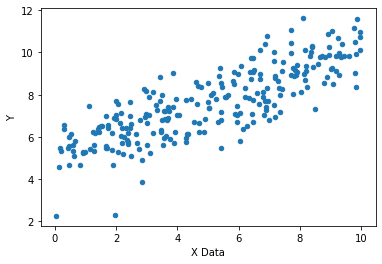

In [5]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.show()

In [6]:
np.random.randn(2)

array([-0.37962915, -0.64435551])

In [7]:
batch_size = 8
m = tf.Variable(-0.37962915)
b = tf.Variable(-0.64435551)

xph = tf.placeholder(tf.float32,[batch_size])
yph = tf.placeholder(tf.float32,[batch_size])

y_model = m*xph + b
error = tf.reduce_sum(tf.square(yph-y_model))

optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
train = optimizer.minimize(error)

init = tf.global_variables_initializer()

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
with tf.Session() as sess:
    sess.run(init)
    
    batches = 1000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data),size=batch_size)
        feed = {
            xph:x_data[rand_ind],
            yph:y_true[rand_ind]
        }
        sess.run(train,feed_dict=feed)
    
    model_m, model_b = sess.run([m,b])

In [11]:
model_m, model_b

(0.51364124, 4.893916)

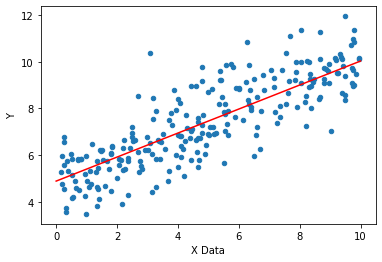

In [12]:
y_hat = x_data*model_m + model_b
my_data.sample(250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(x_data,y_hat,'r')
plt.show()

## tensorflow estimator API (linear regression model)

In [14]:
feat_cols = [
    tf.feature_column.numeric_column(key='x',shape=[1])
]
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

from sklearn.model_selection import train_test_split
x_train,x_eval,y_train,y_eval = train_test_split(x_data,y_true,test_size=0.3,random_state=101)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmpxraopqzr', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb4a3fed30>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [15]:
x_train.shape, x_eval.shape

((700000,), (300000,))

In [20]:
input_func = tf.estimator.inputs.numpy_input_fn(
    {
        'x':x_train
    },
    y_train,
    batch_size=8,
    num_epochs=None,
    shuffle=True
)
train_input_func = tf.estimator.inputs.numpy_input_fn(
    {
        'x':x_train
    },
    y_train,
    batch_size=8,
    num_epochs=1000,
    shuffle=False
)
eval_input_func = tf.estimator.inputs.numpy_input_fn(
    {
        'x':x_eval
    },
    y_eval,
    batch_size=8,
    num_epochs=1000,
    shuffle=False
)

In [21]:
estimator.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmpxraopqzr/model.ckpt-1000
Instructions for updating:
Use standard file utilities to get mtimes.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1000 into /var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmpxraopqzr/model.ckpt.
INFO:tensorflow:loss = 9.749083, step = 1001
INFO:tensorflow:global_step/sec: 718.127
INFO:tensorflow:loss = 7.438346, step = 1101 (0.140 sec)
INFO:tensorflow:global_step/sec: 1401.84
INFO:tensorflow:loss = 9.686631, step = 1201 (0.071 sec)
INFO:tensorflow:global_step/sec: 1328.02
INFO:tensorflow:loss = 6.518793, step = 1301 (0.075 sec)
INFO:tensorflow:global_step/sec: 1530.04
INFO:tensorflow:loss = 11.744985, step = 1401 (0.065 sec)
INFO:tensorflo

In [22]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)


INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-21T16:02:45Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmpxraopqzr/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-06-21-16:02:46
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.0338438, global_step = 2000, label/mean = 7.48248, loss = 8.27075, prediction/mean = 7.471722
INFO:tensorflow:Saving 'che

In [23]:
eval_metrics = estimator.evaluate(input_fn=eval_input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-21T16:02:48Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmpxraopqzr/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2019-06-21-16:02:49
INFO:tensorflow:Saving dict for global step 2000: average_loss = 1.0064929, global_step = 2000, label/mean = 7.4941483, loss = 8.051943, prediction/mean = 7.4527407
INFO:tensorflow:Saving 

In [24]:
print('TRANING DATA METRICS')
print(train_metrics)

TRANING DATA METRICS
{'average_loss': 1.0338438, 'label/mean': 7.48248, 'loss': 8.27075, 'prediction/mean': 7.471722, 'global_step': 2000}


In [25]:
print('EVAL METRICS')
print(eval_metrics)

EVAL METRICS
{'average_loss': 1.0064929, 'label/mean': 7.4941483, 'loss': 8.051943, 'prediction/mean': 7.4527407, 'global_step': 2000}


In [27]:
brand_new_data = np.linspace(0,10,10)
input_fn_predict = tf.estimator.inputs.numpy_input_fn({
    'x':brand_new_data
},shuffle=False)

In [32]:
list(estimator.predict(input_fn=input_fn_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmpxraopqzr/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.843852], dtype=float32)},
 {'predictions': array([5.4275603], dtype=float32)},
 {'predictions': array([6.011269], dtype=float32)},
 {'predictions': array([6.5949774], dtype=float32)},
 {'predictions': array([7.178686], dtype=float32)},
 {'predictions': array([7.762394], dtype=float32)},
 {'predictions': array([8.346103], dtype=float32)},
 {'predictions': array([8.9298115], dtype=float32)},
 {'predictions': array([9.513519], dtype=float32)},
 {'predictions': array([10.097228], dtype=float32)}]

In [33]:
predictions = []
for pred in estimator.predict(input_fn=input_fn_predict):
    predictions.append(pred['predictions'])
predictions

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmpxraopqzr/model.ckpt-2000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[array([4.843852], dtype=float32),
 array([5.4275603], dtype=float32),
 array([6.011269], dtype=float32),
 array([6.5949774], dtype=float32),
 array([7.178686], dtype=float32),
 array([7.762394], dtype=float32),
 array([8.346103], dtype=float32),
 array([8.9298115], dtype=float32),
 array([9.513519], dtype=float32),
 array([10.097228], dtype=float32)]

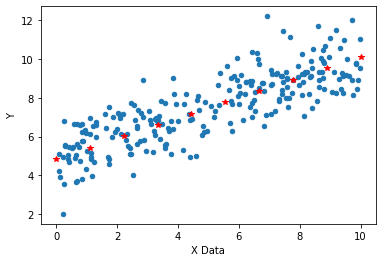

In [35]:
my_data.sample(n=250).plot(kind='scatter',x='X Data',y='Y')
plt.plot(brand_new_data,predictions,'r*')
plt.show()

## TF estimator API (classifiers)

In [36]:
import pandas as pd

In [37]:
diabetes = pd.read_csv('../../Tensorflow-Bootcamp-master/02-TensorFlow-Basics/pima-indians-diabetes.csv')

In [38]:
diabetes.head(3)

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.0,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.0,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.0,0.347243,0.253629,32,1,B


In [39]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [40]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']


In [41]:
## with pandas
diabetes[cols_to_norm] = diabetes[cols_to_norm].apply(lambda x: (x-x.min())/(x.max()-x.min()))
diabetes.head(3)

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.0,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.0,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.0,0.347243,0.253629,32,1,B


In [42]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

In [46]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list(
    'Group',['A','B','C','D']
)

In [45]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket(
#     'Group',
#     hash_bucket_size=10
# )

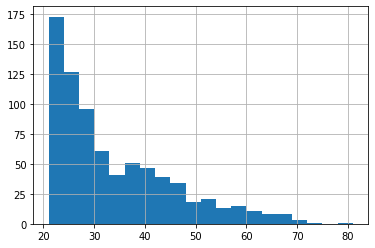

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

diabetes['Age'].hist(bins=20)
plt.show()

In [48]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,assigned_group,age_bucket]

In [50]:
# TRAIN TEST SPLIT
x_data = diabetes.drop('Class',axis=1)
labels = diabetes['Class']
x_data.head(3)

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.0,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.0,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.0,0.347243,0.253629,32,B


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    x_data,
    labels,
    test_size=0.3,
    random_state=101
)

In [54]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)
model = tf.estimator.LinearClassifier(feat_cols,n_classes=2)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmp7qj8bnhp', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb4c88fac8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [55]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmp7qj8bnhp/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 140.509
INFO:tensorflow:loss = 3.9055276, step = 101 (0.713 sec)
INFO:tensorflow:global_step/sec: 395.28
INFO:tensorflow:loss = 5.1393933, step = 201 (0.253 sec)
INFO:tensorflow:global_step/sec: 396.682
INFO:tensorflow:loss = 5.709896, step = 301 (0.252 sec)
INFO:tensorflow:global_step/sec: 399.125
INFO:tensorflow:loss = 3.9163966, step = 401 (0.251 sec)
INFO:tensorflow:global_step/sec: 395.465
INFO:tensorflow:loss = 6.2045045, step = 501 (0.255 sec)
INFO:tensorflow:global_step/sec: 382.319
INFO:tensorflow:loss = 3.

In [59]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_test,
    y=y_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False
)

results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-21T16:41:40Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmp7qj8bnhp/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-21-16:41:42
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.80576134, auc_precision_recall = 0.65469253, average_loss = 0.52176535, global_step = 1000, label/mean = 0.35064936, loss = 5.0219913, precision = 0.65217394, prediction/mean = 0.36810192, recall = 0.5555556
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmp7qj8bnhp/model.ckpt-1000


In [60]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.80576134,
 'auc_precision_recall': 0.65469253,
 'average_loss': 0.52176535,
 'label/mean': 0.35064936,
 'loss': 5.0219913,
 'precision': 0.65217394,
 'prediction/mean': 0.36810192,
 'recall': 0.5555556,
 'global_step': 1000}

In [62]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False
)
predictions = model.predict(pred_input_func)
my_pred = list(predictions)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmp7qj8bnhp/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [63]:
my_pred[:5]

[{'logits': array([0.13275564], dtype=float32),
  'logistic': array([0.53314024], dtype=float32),
  'probabilities': array([0.46685976, 0.53314024], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.6411065], dtype=float32),
  'logistic': array([0.65500355], dtype=float32),
  'probabilities': array([0.34499648, 0.65500355], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.5431973], dtype=float32),
  'logistic': array([0.36744416], dtype=float32),
  'probabilities': array([0.63255584, 0.36744413], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.6783695], dtype=float32),
  'logistic': array([0.3366253], dtype=float32),
  'probabilities': array([0.6633747, 0.3366253], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.7787514], dtype=float32),
  'logistic': ar

#### THE DNN model

In [67]:
embedded_group_col = tf.feature_column.embedding_column(
    assigned_group,
    dimension=4
)

feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,embedded_group_col,age_bucket]
input_func = tf.estimator.inputs.pandas_input_fn(
    X_train,
    y_train,
    batch_size=10,
    num_epochs=1000,
    shuffle=True
)

dnn_model = tf.estimator.DNNClassifier(
    hidden_units=[10,20,20,10,10],
    feature_columns=feat_cols,
    n_classes=2
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmp6183itom', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0xb4cf95828>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [68]:
dnn_model.train(
    input_fn=input_func,
    steps=1000
)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmp6183itom/model.ckpt.
INFO:tensorflow:loss = 6.902147, step = 1
INFO:tensorflow:global_step/sec: 136.57
INFO:tensorflow:loss = 5.141505, step = 101 (0.733 sec)
INFO:tensorflow:global_step/sec: 385.376
INFO:tensorflow:loss = 4.5809, step = 201 (0.260 sec)
INFO:tensorflow:global_step/sec: 382.547
INFO:tensorflow:loss = 4.6819324, step = 301 (0.261 sec)
INFO:tensorflow:global_step/sec: 377.169
INFO:tensorflow:loss = 5.137841, step = 401 (0.265 sec)
INFO:tensorflow:global_step/sec: 382.288
INFO:tensorflow:loss = 5.9564843, step = 501 (0.262 sec)
INFO:tensorflow:global_step/sec: 384.31
INFO:tensorflow:loss = 5.214823, step = 601 (0.260 sec)
INFO:tensorflow:global

In [69]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(
    x=X_test,
    y=y_test,
    batch_size=10,
    num_epochs=1,
    shuffle=False
)
dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-06-21T17:20:18Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmp6183itom/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-06-21-17:20:19
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7619048, accuracy_baseline = 0.64935064, auc = 0.8295473, auc_precision_recall = 0.71152663, average_loss = 0.49198547, global_step = 1000, label/mean = 0.35064936, loss = 4.73536, precision = 0.63829786, prediction/mean = 0.37845284, recall = 0.7407407
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /var/folders/_r/1t3rxwvj54l7tk0jrx5r2j640000gq/T/tmp6183itom/model.ckpt-1000


{'accuracy': 0.7619048,
 'accuracy_baseline': 0.64935064,
 'auc': 0.8295473,
 'auc_precision_recall': 0.71152663,
 'average_loss': 0.49198547,
 'label/mean': 0.35064936,
 'loss': 4.73536,
 'precision': 0.63829786,
 'prediction/mean': 0.37845284,
 'recall': 0.7407407,
 'global_step': 1000}